Nama : Fajari Salim Hanri

NIM  : 1301213299




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Baca dataset
df = pd.read_csv('/content/drive/MyDrive/Tugas_KeamananCerdas/Datasets/Binary_Class_Balanced_Dataset_4Lac_60_Features.csv')

In [ ]:
# Cek nama kolom yang ada
print("Nama kolom dalam dataset:")
print(df.columns)

Nama kolom dalam dataset:
Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag 

In [ ]:
# Cek beberapa baris pertama data
print("\nBeberapa baris pertama data:")
print(df.head())


Beberapa baris pertama data:
   Flow Duration  Total Fwd Packets  Total Backward Packets  \
0            242                  5                       0   
1          32329                  1                       3   
2       10466336                 33                      36   
3        2846733                 21                      24   
4            892                  1                       3   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          154                            0   
1                            0                            0   
2                         2750                         4378   
3                         1458                         2834   
4                            0                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                     46                      0               30.800000   
1                      0                      0               

In [ ]:
# Pisahkan fitur dan label
X = df.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
y = df.iloc[:, -1]   # Kolom terakhir sebagai target

In [ ]:
# Split data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fungsi untuk membuat model Transformer
def create_transformer_model(input_shape):
    inputs = keras.Input(shape=input_shape)

    # Transformer Encoder
    x = keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = keras.layers.MultiHeadAttention(key_dim=64, num_heads=4)(x, x)
    x = keras.layers.Dropout(0.1)(x)
    x = keras.layers.LayerNormalization(epsilon=1e-6)(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.GlobalAveragePooling1D()(x)

    # Output layer
    outputs = keras.layers.Dense(1, activation='sigmoid')(x)

    return keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# K-Fold Cross Validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Menyimpan hasil untuk setiap fold
histories = []
test_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    print(f'Fold {fold + 1}/{n_splits}')

    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Reshape data untuk Transformer (menambahkan dimensi waktu)
    X_train_fold = X_train_fold.reshape((X_train_fold.shape[0], X_train_fold.shape[1], 1))
    X_val_fold = X_val_fold.reshape((X_val_fold.shape[0], X_val_fold.shape[1], 1))

    # Buat dan compile model
    model = create_transformer_model((X_train_fold.shape[1], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=10,  # Jumlah epoch yang kecil untuk proses yang cepat
        batch_size=32
    )

    histories.append(history)

Fold 1/10
Epoch 1/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 364s 40ms/step - accuracy: 0.5001 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 2/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 363s 40ms/step - accuracy: 0.5001 - loss: 0.6932 - val_accuracy: 0.4997 - val_loss: 0.6932
Epoch 3/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 370s 39ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 4/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 386s 39ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.4997 - val_loss: 0.6933
Epoch 5/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 351s 39ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6931
Epoch 6/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 390s 40ms/step - accuracy: 0.5022 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 7/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 379s 40ms/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.4997 - val_loss: 0.6932
Epoch 8/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 381s 39ms/step - 

In [ ]:
    # Evaluasi model pada data test
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
    test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
    test_accuracies.append(test_accuracy)

    print(f'Test accuracy: {test_accuracy:.4f}')

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 0.5032 - loss: 0.6931
Test accuracy: 0.5010


In [ ]:
# Evaluasi model final pada data test
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step


In [ ]:
    # Prediksi pada data validasi
    y_pred_fold = model.predict(X_val_fold)
    y_pred_classes_fold = (y_pred_fold > 0.5).astype(int).flatten()

    # Simpan prediksi dan label yang benar
    y_pred_total.extend(y_pred_classes_fold)
    y_true_total.extend(y_val_fold)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step


In [ ]:
# Cetak classification report
print(classification_report(y_true_total, y_pred_total))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     16105
           1       0.00      0.00      0.00     15895

    accuracy                           0.50     32000
   macro avg       0.25      0.50      0.33     32000
weighted avg       0.25      0.50      0.34     32000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_classes))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67     40077
           1       0.00      0.00      0.00     39923

    accuracy                           0.50     80000
   macro avg       0.25      0.50      0.33     80000
weighted avg       0.25      0.50      0.33     80000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


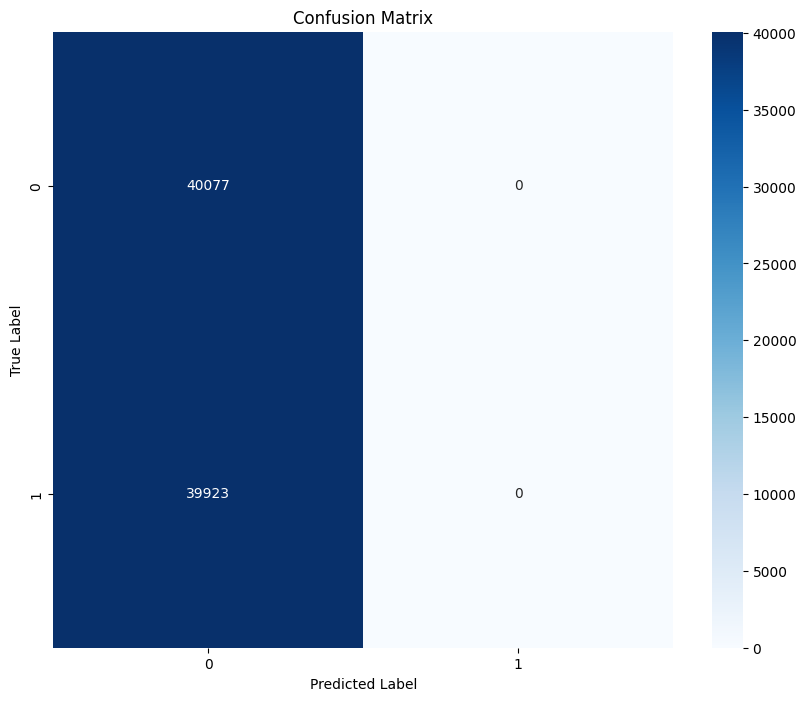

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

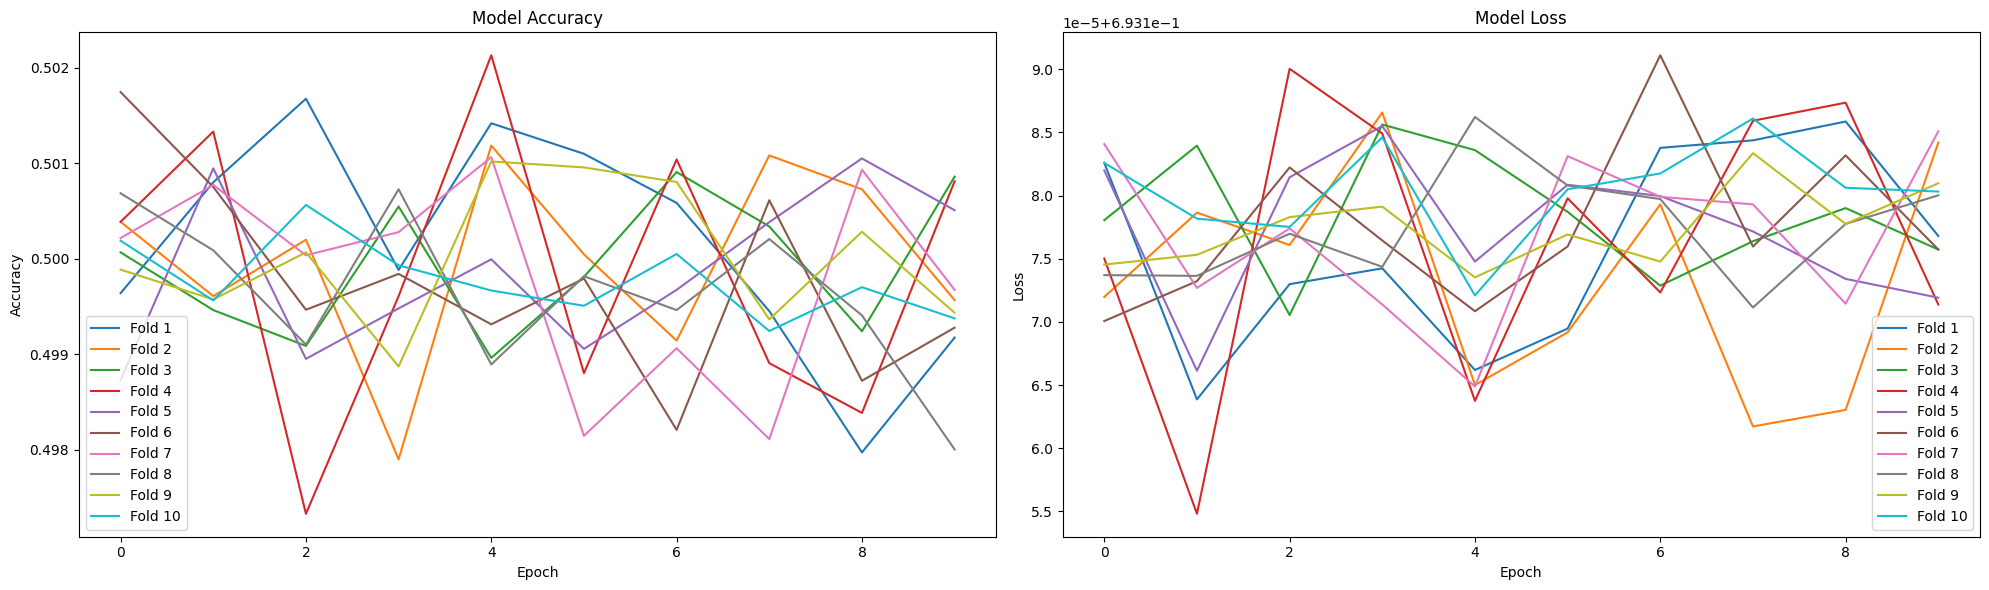

In [ ]:
# Visualisasi akurasi dan loss
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Fold {i+1}')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Fold {i+1}')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

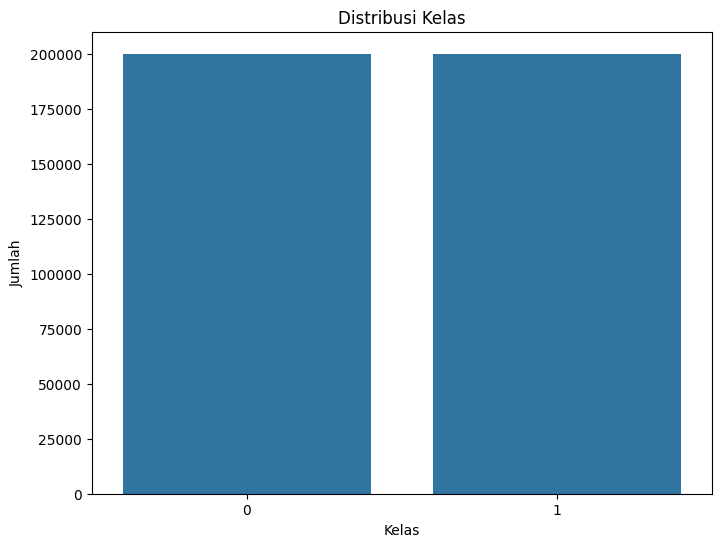

In [ ]:
# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Print rata-rata akurasi test
print(f'Rata-rata akurasi test: {np.mean(test_accuracies):.4f}')

Rata-rata akurasi test: 0.5010


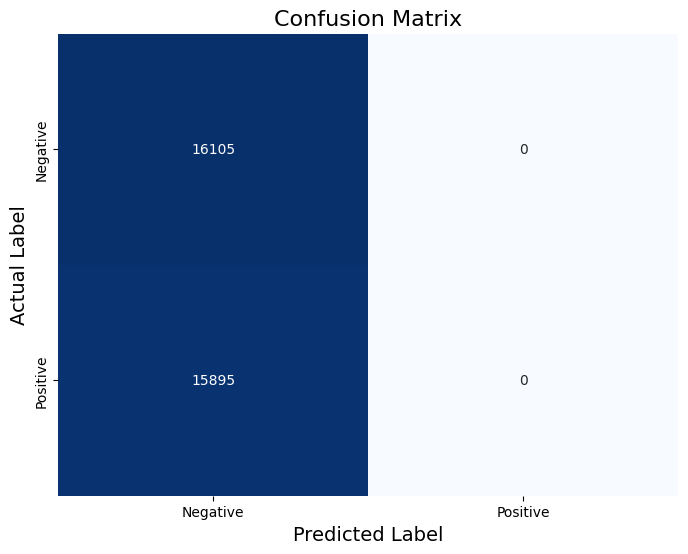

In [ ]:
# Hitung matriks
cm = confusion_matrix(y_true_total, y_pred_total)

# Visualisasi matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()